### CSE-221710304051-Sanjana

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/iris.csv")
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

### Get the frequency of the output categories and visualize it 


In [6]:
data.Species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

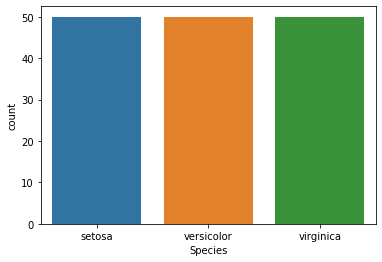

In [7]:
sns.countplot('Species',data=data)

### Apply the Decision Tree Algorithm and Visualize the Decision Tree


In [8]:
#Splitting the dataset
X = data.drop('Species',axis=1)
y = data.Species


In [9]:
#Train_teat_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
#Apply the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

#initialization of object
dtree = DecisionTreeClassifier()

#Applying classifier to dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
#predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 's

In [12]:
#classification report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       1.00      1.00      1.00        37
   virginica       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [13]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

### Compare the performance of training scores and testing scores and check whether the model is overfitting to the data


In [14]:
#prediction on test data(unseen data)
#syntax:objectname.predict(inputvalues)
y_test_pred = dtree.predict(X_test) # corresponding output of X_test is stored in y_test
#compare the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



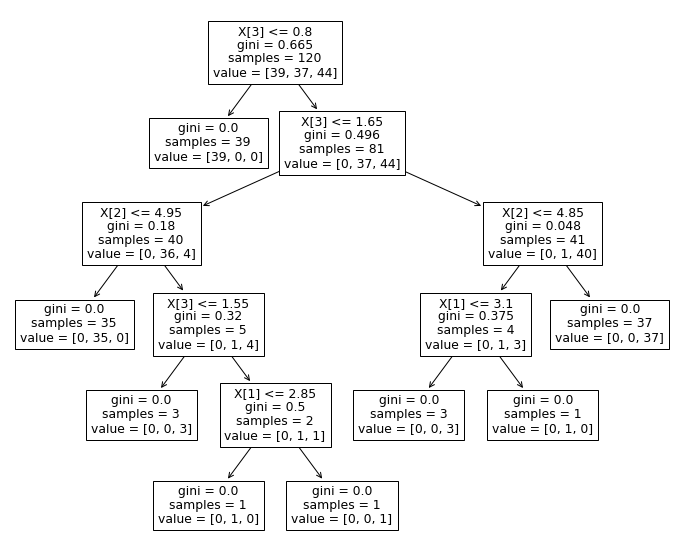

In [15]:
#Visualization of decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)
plt.show()

In [16]:
#KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=3)

array([0.975, 0.9  , 0.925])

### In order to overcome OverFitting, apply some hyper parameter tuning  with help of GridSearch and build the model with the best parameters given by GridSearch


In [17]:
#Hyperparameters
#GridSearchCV-->find optimum parameters
grid_param = {'criterion' : ['gini','entropy'],
             'max_depth' : range(2,10),
             'min_samples_leaf' : range(1,10,1)}

In [18]:
from sklearn.model_selection import GridSearchCV

#initialization
grid_search = GridSearchCV(estimator=dtree,param_grid=grid_param)

#applying gridsearch onto dataset
grid_search.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [19]:
#return optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

In [20]:
#we have to built the model with best parameters
#initialize the DT classifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf= 1)

#we need to fit model to data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
#prediction on test data
pred_test = clf.predict(X_test)

#classification report of actual values and predicted values(gridsearch)
print(classification_report(y_test,pred_test))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

